In [1]:

%load_ext autoreload
%autoreload 

import numpy as np
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path

In [2]:
!pip install pandas==1.5.3

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: torch-tensorrt 1.1.0a0 has a non-standard dependency specifier torch>=1.10.0+cu113<1.11.0. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torch-tensorrt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


# Get the data 

In [62]:
import pandas as pd
fn = sorted(list(Path(".").glob("*list_of_all_stitches*.xlsx")))[-1]
print(fn)
dfst = pd.read_excel(fn)

2024-07_list_of_all_stitches_sorted_by_duration.2024-07-19_17-44-31.xlsx


In [63]:
import plotly.express as px
dfst_st0_only = dfst[dfst["stitch_id"] == 0]
px.scatter(dfst_st0_only, y="movement evaluation stitch", x='annotation_annotation_time_and_movements', hover_data=["filename", "stitch_id"], width=500)


In [28]:
# dfst.reset_index(drop=True)
# dfst

In [29]:
dfst.shape

(150, 111)

In [30]:
dfst

,filename,annotation_annotation_annotation,annotation_annotation_time_and_movements,Stitch duration [s],Stitch start at [s],Needle holder stitch area presence [%],Needle holder stitch median area presence [%],Needle holder stitch length [m],Needle holder stitch visibility [s],Needle holder stitch velocity,...,Scissors piercing velocity,Scissors piercing velocity std,Scissors piercing velocity above threshold,Scissors piercing velocity threshold [m/s],Scissors piercing unit,Scissors piercing visibility [%],Needle holder to forceps piercing average distance [m],Needle holder to forceps piercing below threshold [s],Needle holder to forceps piercing below threshold [%],stitch_id
0,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...,00:00:02 setup good\r\n00:00:07 wrong directio...,2,100.0,8.0,68.342776,88.597734,2.700872,94.133333,0.025311,...,0.000160,0.014025,0.0,0.03,m,100.123457,0.021481,44.866667,83.086420,0
1,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...,00:00:01 suture geomtry drawing is uneven from...,2,125.0,4.0,76.252319,79.468151,4.082694,107.800000,0.029845,...,0.000908,0.058829,0.0,0.03,m,100.123457,0.019131,50.533333,93.580247,0
2,Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_...,00:00:08 setup is mostly good. there is a pen ...,2,92.0,2.0,81.228070,86.842105,3.105033,76.000000,0.032285,...,0.000706,0.042956,0.0,0.03,m,100.144927,0.022210,37.400000,81.304348,0
3,Medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,00:00:02 setup of desk is nice\r\n00:00:06 nee...,3,54.0,5.0,64.977645,97.466468,1.654405,44.733333,0.029229,...,0.000136,0.007302,0.0,0.03,m,100.289855,0.011459,20.333333,88.405797,0
4,Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4,00:00:05 forceps are placed in the right posit...,1,235.0,35.0,77.207455,94.347693,3.310901,218.200000,0.013598,...,0.000595,0.552104,2.0,0.03,m,99.398496,0.010368,129.133333,97.092732,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2023-02-21_SchuldtSalome_Einzelknopfnaht_am_Sc...,00:00:30 stitch_start\r\n00:01:00 a lot of mov...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
146,Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...,00:00:02 scissors missing from setup\r\n00:00:...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
147,Einzelknopfnaht_Lina_Schäfer.mp4,"sehr gut, etwas aufpassen weger der Nadel, es ...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
148,Schiesser_David_post_test.mp4,00:00:04 stitch_start\r\n00:00:47 knot_start\r...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [31]:
pd.__version__

'1.5.3'

# Find the correlation

In [32]:
# count numeric values in columns
# dfs.drop(["filename", "stars_auto"], axis=1).apply(lambda x: x.dtype is float).sum()
# relevant_column = "is_pretest_num"
relevant_column = "movement evaluation stitch"
# df

In [33]:
# # remove columns containing " stitch 1" in their name
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 1")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 2")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 3")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 4")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 1")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 2")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 3")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 4")], axis=1)
# # dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("n_stitches_by_user")], axis=1)
# # dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("annotation_annotation_stars")], axis=1)



In [34]:
# dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)["Needle holder stitch length [m]"]
dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False)



movement evaluation stitch                         1.000000
Stitch duration [s]                                0.768717
Piercing duration [s]                              0.744812
Needle holder stitch visibility [s]                0.711710
Knot duration [s]                                  0.694690
                                                     ...   
Forceps knot velocity threshold [m/s]                   NaN
Scissors knot velocity threshold [m/s]                  NaN
Needle holder piercing velocity threshold [m/s]         NaN
Forceps piercing velocity threshold [m/s]               NaN
Scissors piercing velocity threshold [m/s]              NaN
Name: movement evaluation stitch, Length: 100, dtype: float64

In [35]:

corr = dfst.corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False).head(8)
corr = corr[corr.index != relevant_column] 
cols_X = list(corr.index)
sample_id_cols = ["filename", "stitch_id"]
corr


Stitch duration [s]                                      0.768717
Piercing duration [s]                                    0.744812
Needle holder stitch visibility [s]                      0.711710
Knot duration [s]                                        0.694690
Needle holder piercing visibility [s]                    0.689119
Needle holder to forceps piercing below threshold [s]    0.642263
Needle holder to forceps stitch below threshold [s]      0.639829
Name: movement evaluation stitch, dtype: float64

### Pearson correlation test

P-value:

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
* The null hypothesis for the Pearson correlation test is that there is no linear correlation between the two variables.

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

results = {}

for column in cols_X:
    if column != relevant_column:
        
        dftest = dfst[[column, relevant_column]].copy()
        dftest = dftest.dropna()
        
        vals0 = dftest[column] 
        vals1 = dftest[relevant_column]
        
        corr_coef, p_value = pearsonr(vals0, vals1)
        results[column] = {'correlation_coefficient': corr_coef, 'p_value': p_value}

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,correlation_coefficient,p_value
Stitch duration [s],-0.768717,1.141612e-11
Piercing duration [s],-0.744812,1.279823e-09
Needle holder stitch visibility [s],-0.711710,1.609781e-09
Knot duration [s],-0.694690,4.318152e-08
Needle holder piercing visibility [s],-0.689119,6.112989e-08
Needle holder to forceps piercing below threshold [s],-0.642263,8.621177e-07
Needle holder to forceps stitch below threshold [s],-0.639829,1.900394e-07



## Find the best columns to predict annotation_annotation_stars

In [37]:
dfst.columns[dfst.columns.str.contains("annotation_annotation")]

Index(['annotation_annotation_annotation', 'annotation_annotation_time_and_movements'], dtype='object')

In [38]:

dfst.columns[dfst.columns.str.contains("duration")]


Index(['Stitch duration [s]', 'Knot duration [s]', 'Piercing duration [s]'], dtype='object')

In [39]:
# get columns containing "0"
# cols_with_0 = list(dfs.columns[dfs.columns.str.contains("0")])
# cols_with_0

In [40]:
# try to find the best columns to predict stars_auto
# corr = dfs[cols_with_0 + [relevant_column]].corr(numeric_only=True)[relevant_column].abs().sort_values(ascending=False) #.head(20)
# corr = corr[corr.index != "stars_auto"] 

# corr

In [41]:
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# measurement_vs_annotation_separator = dfs.columns.str.contains("annotation_annotation")
# # corr = dfs.corr(numeric_only=True)["annotation_annotation_stars"].abs().sort_values(ascending=False).head(7)
# # corr on one axis measurement, on the other annotation, just the first 10
# corr = dfs.corr(numeric_only=True).abs()
# corr





In [42]:
#select the columns containing "annotation_annotation" in their name
# measurement_vs_annotation_separator = corr.index.str.contains("annotation_annotation")
# measurement_vs_annotation_separator

In [43]:
# import seaborn as sns
# g = sns.pairplot(dfs, y_vars=corr.index[measurement_vs_annotation_separator], 
#              x_vars=corr.index[~measurement_vs_annotation_separator],
#              # x_vars=["stars_auto"]
#              # hue="n_stitches_by_user"
#              )
# g.map_lower(sns.kdeplot, levels=3, color=".2")

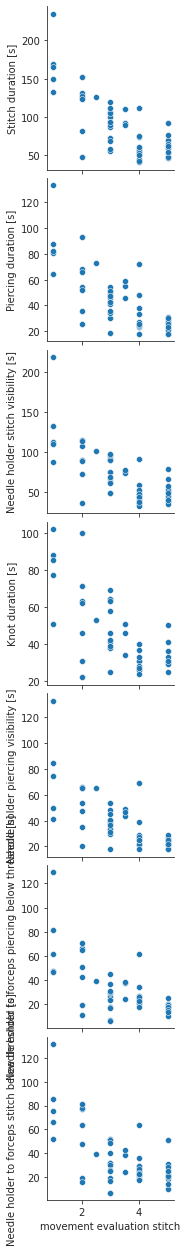

In [44]:

sns.pairplot(dfst, y_vars=corr.index,
             # x_vars=corr.index,
             x_vars=[relevant_column]
             )


In [45]:
# make interactive graph on hover display filename and stitch_id and control the width of the plot
import plotly.express as px
px.scatter(dfst, y="Needle holder stitch visibility [s]", x=relevant_column, hover_data=["filename", "stitch_id"], width=500)
# px.scatter(dfs, x="Needle holder stitch length [m]", y=relevant_column)


In [46]:

import plotly.express as px
px.scatter(dfst, y="Needle holder stitch length [m]", x=relevant_column, hover_data=["filename", "stitch_id"], width=500)


In [47]:
list(corr.index)

['Stitch duration [s]',
 'Piercing duration [s]',
 'Needle holder stitch visibility [s]',
 'Knot duration [s]',
 'Needle holder piercing visibility [s]',
 'Needle holder to forceps piercing below threshold [s]',
 'Needle holder to forceps stitch below threshold [s]']

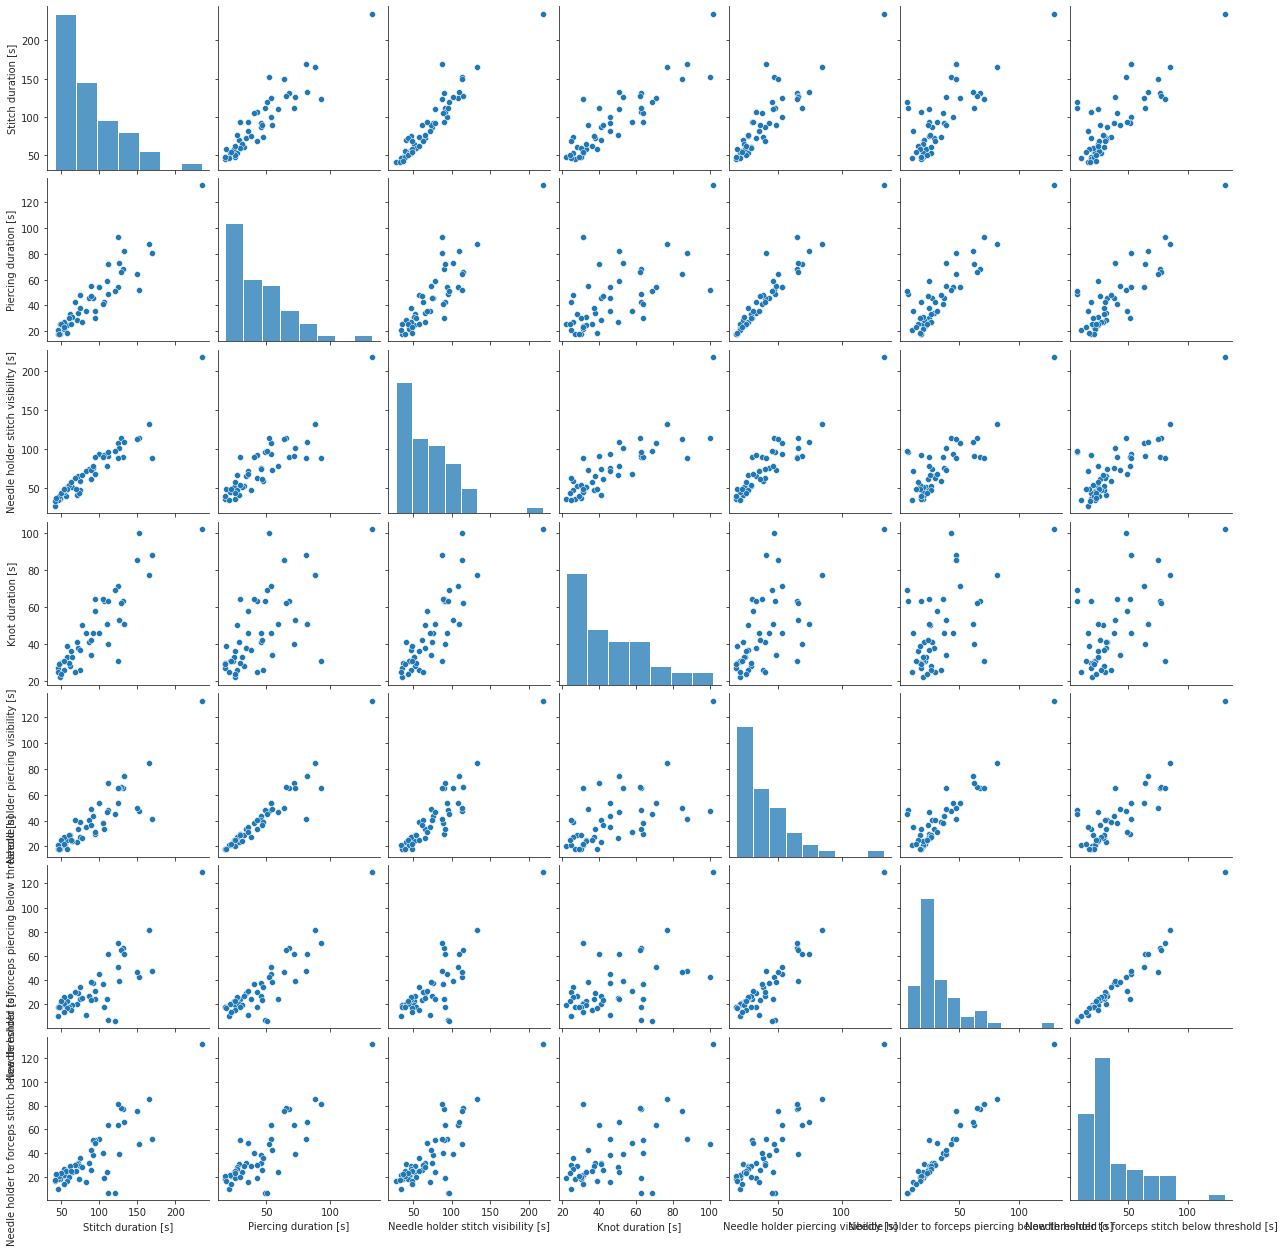

In [48]:

sns.pairplot(dfst, y_vars=list(corr.index),
             x_vars=list(corr.index),
             # x_vars=[relevant_column]
             )


In [48]:

# corr = dfs.corr(numeric_only=True)["stars_auto"].sort_values(ascending=False).head(10)
# corr


In [49]:
# columns_to_be_removed = ["stars_auto"]
# columns = list(corr.index)
# columns = [col for col in columns if col not in columns_to_be_removed]
# columns 

In [50]:
# pretest_mean = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].mean()
# posttest_mean = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].mean()
# pretest_var = dfs[dfs[relevant_column] == 1][cols_with_0 + [relevant_column]].var()
# posttest_var = dfs[dfs[relevant_column] == 0][cols_with_0 + [relevant_column]].var()






## Check correlation between selected columns


In [53]:
for colname in dfst.columns:
    print(colname)


filename
annotation_annotation_annotation
annotation_annotation_time_and_movements
Stitch duration [s]
Stitch start at [s]
Needle holder stitch area presence [%]
Needle holder stitch median area presence [%]
Needle holder stitch length [m]
Needle holder stitch visibility [s]
Needle holder stitch velocity
Needle holder stitch velocity std
Needle holder stitch velocity above threshold
Needle holder stitch velocity threshold [m/s]
Needle holder stitch unit
Needle holder stitch visibility [%]
Forceps stitch area presence [%]
Forceps stitch median area presence [%]
Forceps stitch length [m]
Forceps stitch visibility [s]
Forceps stitch velocity
Forceps stitch velocity std
Forceps stitch velocity above threshold
Forceps stitch velocity threshold [m/s]
Forceps stitch unit
Forceps stitch visibility [%]
Scissors stitch area presence [%]
Scissors stitch median area presence [%]
Scissors stitch length [m]
Scissors stitch visibility [s]
Scissors stitch velocity
Scissors stitch velocity std
Scissors

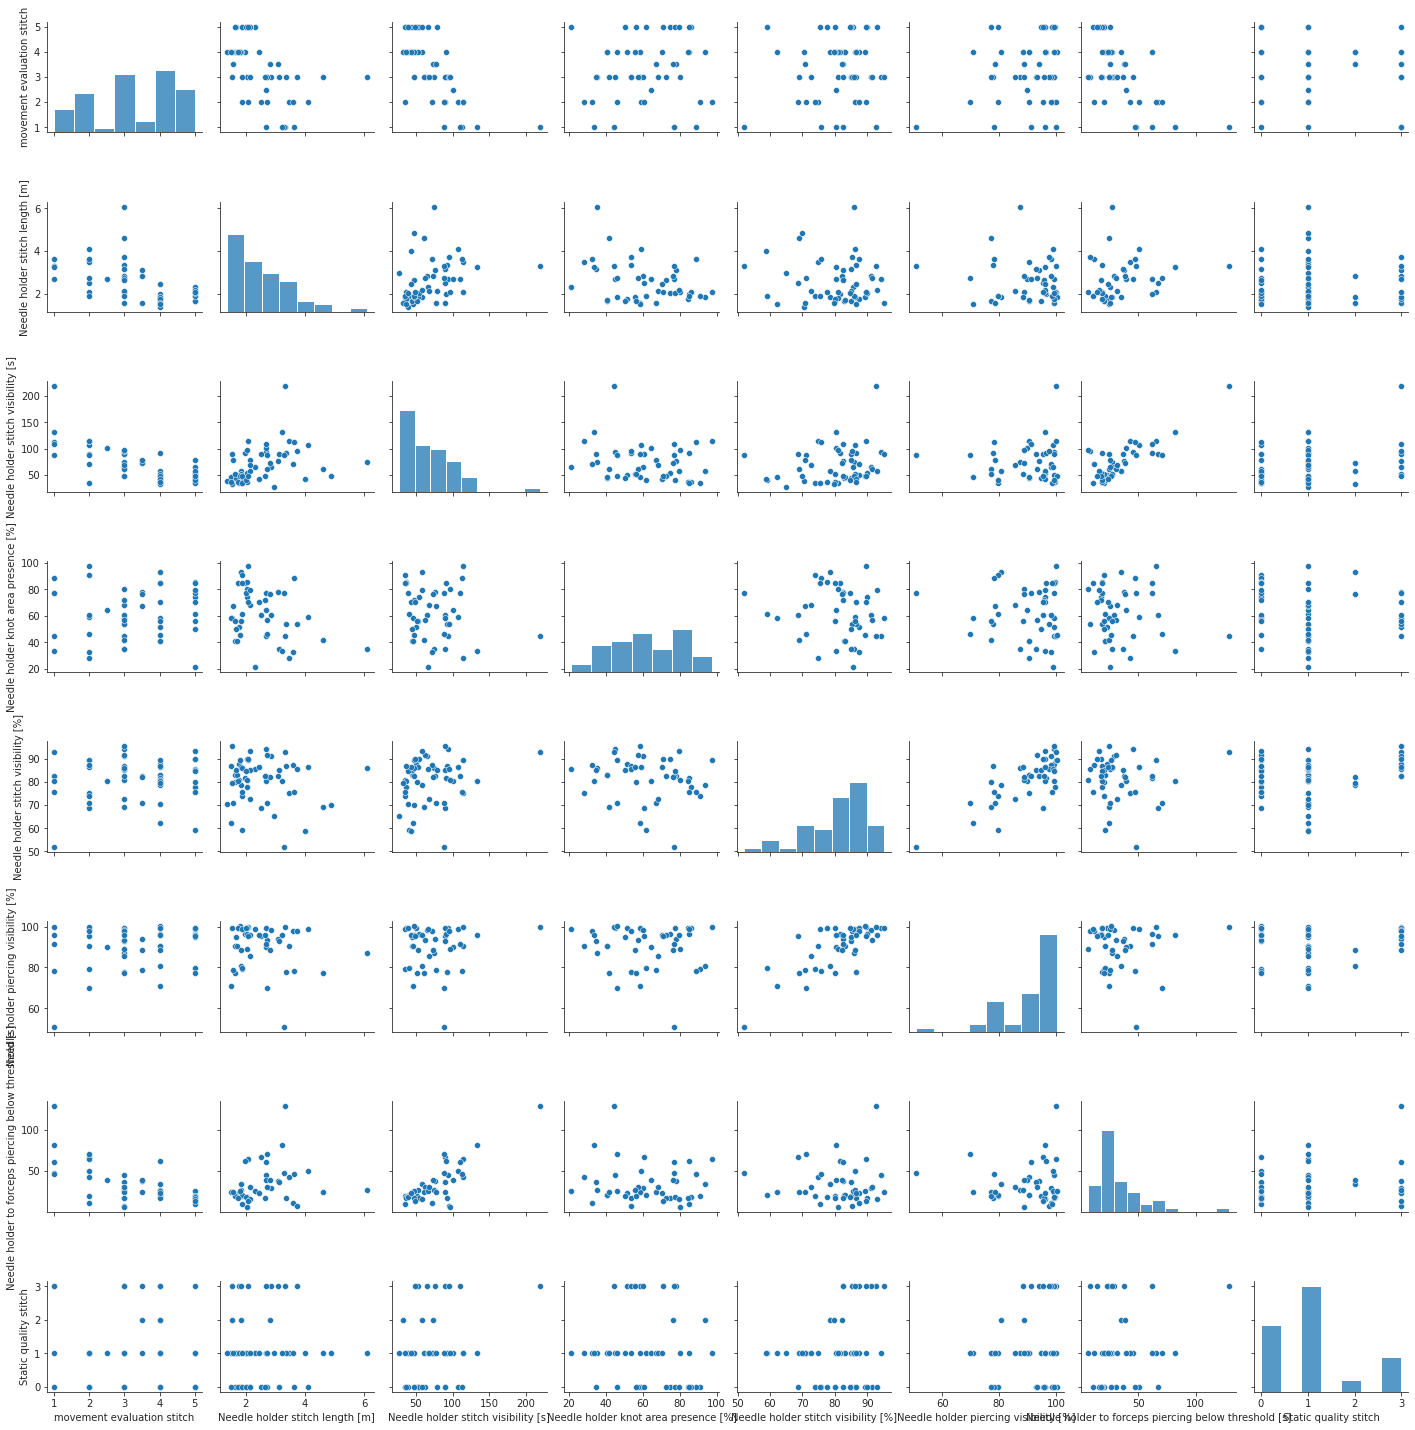

In [58]:
selected_columns = [ "movement evaluation stitch", 
                     "Needle holder stitch length [m]",
                     "Needle holder stitch visibility [s]", "Needle holder knot area presence [%]", 
                     "Needle holder stitch visibility [%]", 
                     
                     "Needle holder piercing visibility [%]", "Needle holder to forceps piercing below threshold [s]",
                     "Static quality stitch"
                     ]

sns.pairplot(dfst, y_vars=
                selected_columns,
             x_vars=selected_columns,
             # x_vars=[relevant_column]
             )


In [51]:
# df_stats = pd.DataFrame({"pretest": pretest_mean, "posttest": posttest_mean, "pretest_var": pretest_var, "posttest_var": posttest_var})
# df_stats["diff"] = df_stats["pretest"] - df_stats["posttest"]
# df_stats

In [52]:
print(len(dfst))
dfst[cols_X + [relevant_column]].notna().sum()

145


Stitch duration [s]                              59
Knot duration [s]                                50
Needle holder stitch visibility [s]              54
Needle holder knot visibility [s]                46
Forceps stitch visibility [s]                    50
Needle holder stitch velocity above threshold    54
Needle holder stitch length [m]                  54
movement evaluation stitch                       57
dtype: int64

In [53]:
dfst[cols_X + [relevant_column]]

,Stitch duration [s],Knot duration [s],Needle holder stitch visibility [s],Needle holder knot visibility [s],Forceps stitch visibility [s],Needle holder stitch velocity above threshold,Needle holder stitch length [m],movement evaluation stitch
0,152.0,100.0,113.866667,66.800000,43.466667,36.0,3.463331,2.0
1,106.0,63.0,91.733333,58.266667,9.733333,29.0,3.342189,3.0
2,179.0,95.0,134.466667,65.200000,55.733333,33.0,4.693209,1.0
3,41.6,NaN,27.000000,NaN,16.666667,8.0,2.948527,NaN
4,75.0,37.0,46.600000,19.733333,20.066667,14.0,1.509013,4.0
...,...,...,...,...,...,...,...,...
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,54.0,31.0,48.400000,26.466667,NaN,18.0,2.143602,5.0
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# ! pip install ace_tools

# Statistical testing

In [55]:
import pandas as pd
import scipy.stats as stats

# Columns to compare
# cols_with_0 = list(df_stats.index)  # Replace with your actual column names
# relevant_column = "is_pretest_num"



# DataFrames for each group
pretest_df = dfst[dfst[relevant_column] > 2.5][["filename"] + cols_X]
posttest_df = dfst[dfst[relevant_column] <= 2.5][["filename"] + cols_X]

# Ensure both dataframes are sorted by the same criteria to maintain pairing
pretest_df.sort_values(by="filename", inplace=True)
posttest_df.sort_values(by="filename", inplace=True)


# Perform t-tests
t_stats = []
p_values = []
col_names =[]
t_stats_less = []
p_values_less = []
col_names_less =[]
t_stats_greater = []
p_values_greater = []
col_names_greater =[]

data = {
    "col_name": [],
    "p_value_two-sided": [],
    "p_value_less": [],
    "p_value_greater": [],
    "t_stat_two-sided": [],
    "t_stat_less": [],
    "t_stat_greater": [],
}
for col in cols_X:
    try:
        data["col_name"].append(col)
        for alternative in ["two-sided", "less", "greater"]:
            
            t_stat, p_value = stats.ttest_ind(pretest_df[col], posttest_df[col], equal_var=False, alternative=alternative, nan_policy='omit')  # Assuming unequal variance
            data[f"t_stat_{alternative}"].append(t_stat)
            data[f"p_value_{alternative}"].append(p_value)
    except:
        print(col)
        import traceback
        traceback.print_exc()

# Collect the statistics in a DataFrame
print(data)
df_stats = pd.DataFrame(
    data
)


df_stats

{'col_name': ['Stitch duration [s]', 'Knot duration [s]', 'Needle holder stitch visibility [s]', 'Needle holder knot visibility [s]', 'Forceps stitch visibility [s]', 'Needle holder stitch velocity above threshold', 'Needle holder stitch length [m]'], 'p_value_two-sided': [7.925858092633967e-07, 0.0001561136875284389, 0.0004186855705974712, 0.010408400764817981, 0.004369971084700192, 0.0004085772983195402, 0.0007888300340451512], 'p_value_less': [3.9629290463169834e-07, 7.805684376421945e-05, 0.0002093427852987356, 0.005204200382408991, 0.002184985542350096, 0.0002042886491597701, 0.0003944150170225756], 'p_value_greater': [0.9999996037070954, 0.9999219431562358, 0.9997906572147013, 0.994795799617591, 0.99781501445765, 0.9997957113508402, 0.9996055849829774], 't_stat_two-sided': [-6.830548153145789, -4.614786154950494, -4.383445325092779, -2.855864923253953, -3.3344157311609557, -4.191267334708782, -3.720812622704407], 't_stat_less': [-6.830548153145789, -4.614786154950494, -4.38344532

,col_name,p_value_two-sided,p_value_less,p_value_greater,t_stat_two-sided,t_stat_less,t_stat_greater
0,Stitch duration [s],7.925858e-07,3.962929e-07,1.000000,-6.830548,-6.830548,-6.830548
1,Knot duration [s],1.561137e-04,7.805684e-05,0.999922,-4.614786,-4.614786,-4.614786
2,Needle holder stitch visibility [s],4.186856e-04,2.093428e-04,0.999791,-4.383445,-4.383445,-4.383445
3,Needle holder knot visibility [s],1.040840e-02,5.204200e-03,0.994796,-2.855865,-2.855865,-2.855865
4,Forceps stitch visibility [s],4.369971e-03,2.184986e-03,0.997815,-3.334416,-3.334416,-3.334416
5,Needle holder stitch velocity above threshold,4.085773e-04,2.042886e-04,0.999796,-4.191267,-4.191267,-4.191267
6,Needle holder stitch length [m],7.888300e-04,3.944150e-04,0.999606,-3.720813,-3.720813,-3.720813


In [56]:
pretest_df.mean()


C:\Users\Jirik\AppData\Local\Temp\ipykernel_18748\3326586540.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Stitch duration [s]                              77.650000
Knot duration [s]                                42.000000
Needle holder stitch visibility [s]              63.214414
Needle holder knot visibility [s]                31.987500
Forceps stitch visibility [s]                    29.301010
Needle holder stitch velocity above threshold    19.864865
Needle holder stitch length [m]                   2.349106
dtype: float64

In [57]:
posttest_df.mean()

C:\Users\Jirik\AppData\Local\Temp\ipykernel_18748\3993572716.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Stitch duration [s]                              141.812500
Knot duration [s]                                 68.437500
Needle holder stitch visibility [s]              108.209524
Needle holder knot visibility [s]                 46.942857
Forceps stitch visibility [s]                     58.771429
Needle holder stitch velocity above threshold     30.928571
Needle holder stitch length [m]                    3.287517
dtype: float64

## Find general correlation



In [58]:
# cols

In [59]:
# list(cols)

In [60]:
# try to find the best columns to predict stars_auto


# corr = dfs.corr(numeric_only=True)
# numeric_cols = corr.columns[corr.columns.str.contains("annotation_annotation")]
# corr = corr[numeric_cols].abs()# .sort_values(by="annotation_annotation_stars", ascending=False).head(10)
# # keep just rows not containing "annotation_annotation" in the index
# corr = corr[~corr.index.str.contains("annotation_annotation")]
# 
# # [list(cols)].abs()# .sort_values(ascending=False).head(10)
# # corr = corr[corr.index != "stars_auto"] 
# 
# corr

In [61]:
# argmax in dataframe
corr.loc[corr.idxmax()]

0.7962570760615516

In [62]:
# dfs[["annotation_annotation_knots_are_done_right", 'filename']]

# Train predictor

In [63]:
print(corr.shape)
corr = corr.dropna()
print(corr.shape)


(7,)
(7,)


In [64]:
corr.index

Index(['Stitch duration [s]', 'Knot duration [s]',
       'Needle holder stitch visibility [s]',
       'Needle holder knot visibility [s]', 'Forceps stitch visibility [s]',
       'Needle holder stitch velocity above threshold',
       'Needle holder stitch length [m]'],
      dtype='object')

In [65]:
import sklearn
# train a model to predict stars_auto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import SVM
from sklearn.svm import SVR
# sample_id_cols = ["filename", "stitch_id"]
#train a model to predict stars_auto

predicted_columns = [relevant_column]  # list(corr.columns[corr.columns.str.contains("is_pretest_num")])
# columns = list(corr.index[~corr.index.str.contains(relevant_column)])
# columns = cols_X + sample_id_cols
# columns = list(corr.index)
# columns.append("filename")
print(predicted_columns)
# print(columns)



['movement evaluation stitch']


### Remove NA values

In [66]:
# remove known problematic columns

# # remove row with index 1708
# if 1708 in dfs.index:
#     dfs = dfs.drop(1708)
# 
# if 1667 in dfs.index:
#     dfs = dfs.drop(1667)
# 
# # remove "qr_data_pix_size_single_frame_detector_m" from the columns
# if "qr_data_pix_size_single_frame_detector_m" in columns:
#     columns.remove("qr_data_pix_size_single_frame_detector_m")

# dfs[cols].isna().sum()


In [67]:
dfst[["filename", "stitch_id"] + sample_id_cols + cols_X]

,filename,stitch_id,filename,stitch_id,Stitch duration [s],Knot duration [s],Needle holder stitch visibility [s],Needle holder knot visibility [s],Forceps stitch visibility [s],Needle holder stitch velocity above threshold,Needle holder stitch length [m]
0,Medium-RPReplay_Final1634048018.mp4,0,Medium-RPReplay_Final1634048018.mp4,0,152.0,100.0,113.866667,66.800000,43.466667,36.0,3.463331
1,Medium-Schweinefu_.mp4,0,Medium-Schweinefu_.mp4,0,106.0,63.0,91.733333,58.266667,9.733333,29.0,3.342189
2,Bildschirmaufnahme_2022-10-11_um_11.20.24.mov,0,Bildschirmaufnahme_2022-10-11_um_11.20.24.mov,0,179.0,95.0,134.466667,65.200000,55.733333,33.0,4.693209
3,11.4.2024.HarmsSören.NHT.mp4,0,11.4.2024.HarmsSören.NHT.mp4,0,41.6,NaN,27.000000,NaN,16.666667,8.0,2.948527
4,Pre_-Test_Isabel_Linden.mp4,0,Pre_-Test_Isabel_Linden.mp4,0,75.0,37.0,46.600000,19.733333,20.066667,14.0,1.509013
...,...,...,...,...,...,...,...,...,...,...,...
140,Einzelknopfnaht_Elena.Vai-Wieting.mov,4,Einzelknopfnaht_Elena.Vai-Wieting.mov,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,EinzelknopfnahtamSchweinefuss_Muenzner_Simeon.mp4,4,EinzelknopfnahtamSchweinefuss_Muenzner_Simeon.mp4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,Stresstest_Einzelknopfnaht.mp4,4,Stresstest_Einzelknopfnaht.mp4,4,54.0,31.0,48.400000,26.466667,NaN,18.0,2.143602
143,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...,4,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:

# count NA values in columns

dfst[cols_X + sample_id_cols].isna().sum().sort_values(ascending=False)


Needle holder knot visibility [s]                99
Knot duration [s]                                95
Forceps stitch visibility [s]                    95
Needle holder stitch visibility [s]              91
Needle holder stitch velocity above threshold    91
Needle holder stitch length [m]                  91
Stitch duration [s]                              86
filename                                          0
stitch_id                                         0
dtype: int64

In [69]:
dfst[cols_X + sample_id_cols].isna().sum(axis=1).sort_values(ascending=False)

72     7
88     7
105    7
104    7
103    7
      ..
25     0
118    0
24     0
44     0
0      0
Length: 145, dtype: int64

In [70]:
dfsc = dfst[
    dfst["Stitch duration [s]"].notna() &
    dfst["Needle holder stitch visibility [s]"].notna() &
    dfst[predicted_columns[0]].notna()
    # dfs[predicted_columns].notna()
]
display(dfsc)
cols_X_with_sample_id = sample_id_cols + cols_X

dfsc[cols_X_with_sample_id].isna().sum().sort_values(ascending=False)

display(dfsc[cols_X_with_sample_id].isna().sum().sort_values(ascending=False))

# fill 0 instead of None
dfsc = dfsc[sample_id_cols + predicted_columns + cols_X].copy()
dfsc[cols_X] = dfsc[cols_X].fillna(0)

print(len(dfsc))

,filename,annotation_annotation_annotation,annotation_annotation_time_and_movements,Needle holder stitch length [m],Needle holder stitch visibility [s],Needle holder stitch velocity,Needle holder stitch unit,Needle holder stitch visibility [%],Needle holder stitch area presence [%],Forceps stitch length [m],...,Scissors piercing length [m],Scissors piercing visibility [s],Scissors piercing velocity,Scissors piercing velocity std,Scissors piercing velocity above threshold,Scissors piercing velocity threshold [m/s],Scissors piercing unit,Scissors piercing visibility [%],Scissors piercing visibility [%].1,stitch_id
0,Medium-RPReplay_Final1634048018.mp4,00:00:07 grab needle holder more in the back\r...,2.0,3.463331,113.866667,0.022641,m,74.912281,52.985948,0.678763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Medium-Schweinefu_.mp4,00:00:05 start\r\n00:01:49 end\r\n00:00:30 Tak...,1.0,3.342189,91.733333,0.031544,m,86.540881,65.479651,0.475117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Bildschirmaufnahme_2022-10-11_um_11.20.24.mov,00:00:17 stitch_start\r\n00:01:41 knot_start\r...,1.0,4.693209,134.466667,0.028877,m,75.121043,63.609321,0.766312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Pre_-Test_Isabel_Linden.mp4,00:00:09 stitch_start\r\n00:00:47 knot_start\r...,1.0,1.509013,46.600000,0.020504,m,62.133333,77.253219,0.320440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,"Gehrke,Yves - post.mp4",00:00:02 stitch_start \r\n00:00:36 knot_start\...,1.0,2.837274,65.666667,0.035097,m,91.203704,64.670051,0.576926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,"Hilger,Anke-Posttest.mp4",00:00:06 stitch_start\r\n00:00:45 knot\r\n00:0...,1.0,1.361027,39.400000,0.025297,m,70.357143,69.712352,0.553835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,Schiesser_David_post_test.mp4,00:00:04 stitch_start\r\n00:00:47 knot_start\r...,1.0,2.732524,62.200000,0.038436,m,91.470588,71.704180,0.524773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,Fehringer_Pascal__post_test.mp4,00:00:02 stitch_start\r\n00:00:38 knot_start\r...,1.0,3.598281,71.533333,0.041703,m,87.235772,49.580615,0.188940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4,00:00:05 forceps are placed in the right posit...,1.0,3.310875,218.133333,0.013602,m,92.822695,77.231051,1.317120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...,00:00:01 suture geomtry drawing is uneven from...,2.0,4.082597,107.733333,0.029862,m,86.186667,76.237624,1.275761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Forceps stitch visibility [s]                    6
Knot duration [s]                                5
Needle holder knot visibility [s]                5
filename                                         0
stitch_id                                        0
Stitch duration [s]                              0
Needle holder stitch visibility [s]              0
Needle holder stitch velocity above threshold    0
Needle holder stitch length [m]                  0
dtype: int64

51


In [71]:
# dfsc[predicted_columns].isna()

In [72]:
predicted_columns

['movement evaluation stitch']

In [105]:
maximum_number_of_columns = 3
# maximum_number_of_columns = len(cols_X)

results = {}

models = []
for i in range(1, maximum_number_of_columns + 1):
    for predicted_column in predicted_columns:
        # if True:
        #     predicted_column = "annotation_annotation_stars"
        first_columns = cols_X[:i] + sample_id_cols
        cols = first_columns.copy()
        cols.append(predicted_column)
    

        dfsx = dfsc[cols].copy()
        l1 = len(dfsx)
        dfsx = dfsx.dropna()
        l2 = len(dfsx)
        assert l1 == l2, "There are still NA values in the data"
        X = dfsx[first_columns].drop(sample_id_cols, axis=1)
        # X = X.drop(predicted_column, axis=1)
        y = dfsx[predicted_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        clf = SVR()
        clf.fit(X_train, y_train)
        # score
        # The coefficient R^2 is defined as (1 - u/v), 
        # where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() 
        # and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum().
        # Best possible score is 1.0, lower values are worse.


    
        # clf.score(X_test, y_test)
        # 
        # X
        # from sklearn.neural_network import MLPClassifier
        # clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
        #                     hidden_layer_sizes=(5, 2), random_state=1)

        # train regresion
        # clf = LinearRegression()
        # from sklearn.neural_network import MLPRegressor
        # clf = MLPRegressor(random_state=1, max_iter=500)

        clf.fit(X_train, y_train)
        clf.score(X_test, y_test)
        pred_test = clf.predict(X_test)
        pred_train = clf.predict(X_train)
        results[predicted_column] = {"score": clf.score(X_test, y_test), "model": clf}
        print(f"{X_train.shape} {len(X_train)} {len(X_test)} {predicted_column} {clf.score(X_test, y_test)}")
        models.append(clf)
    # print(predicted_column, clf.score(X_test, y_test))



(40, 1) 40 11 movement evaluation stitch 0.4040253383161204
(40, 2) 40 11 movement evaluation stitch 0.20079623612881448
(40, 3) 40 11 movement evaluation stitch 0.08213773279168379


In [106]:

# print(predicted_column, clf.score(y_test, y_test))


In [107]:
# results

{'movement evaluation stitch': {'score': 0.08213773279168379, 'model': SVR()}}

In [108]:
# i = 0
# 
# y_test = dfsc[predicted_columns[0]]
# selected_cols = cols_X[:(i + 1)]
# 
# dfsx = dfsc[selected_cols].copy()
# dfsy = dfsc[relevant_column].copy()
# 
# 
# pred_test = models[i].predict(dfsx)
np.asarray(list(zip(list(pred_test), list(y_test))))
# list(pred_test)
# list(y_test)
# pred_test

array([[4.37100653, 5.        ],
       [2.12388324, 3.        ],
       [4.56434662, 3.        ],
       [4.56947878, 4.        ],
       [2.38102816, 3.        ],
       [3.97006977, 4.        ],
       [2.96054123, 2.        ],
       [4.47078023, 4.        ],
       [4.33384525, 4.        ],
       [4.35709064, 4.        ],
       [4.55304986, 4.        ]])

<AxesSubplot: xlabel='real', ylabel='predicted'>

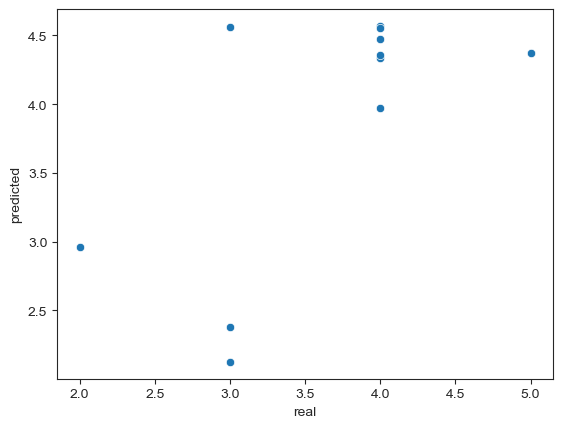

In [109]:
df_test = pd.DataFrame(np.asarray(list(zip(pred_test, y_test))), columns=["predicted", "real"])
sns.scatterplot(data=df_test, y="predicted", x="real")

<AxesSubplot: xlabel='predicted', ylabel='real'>

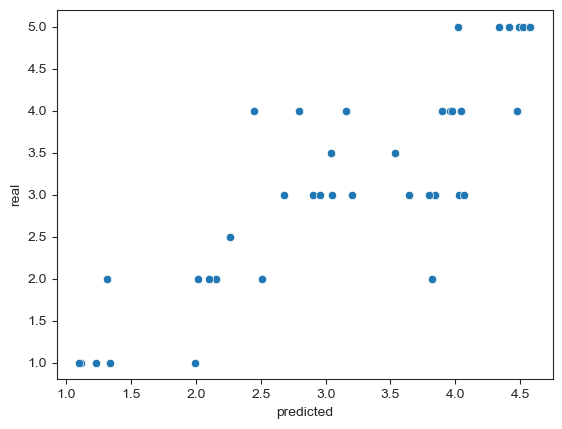

In [110]:

df_test = pd.DataFrame(np.asarray(list(zip(pred_train, y_train))), columns=["predicted", "real"])
sns.scatterplot(data=df_test, x="predicted", y="real")


0.5

NameError: name 'clf' is not defined

922    2
928    0
939    0
924    2
Name: stars_auto, dtype: int32

In [78]:
dfst.columns[dfst.columns.str.contains("duration")]

Index(['Stitch duration [s]', 'Stitch duration [%]'], dtype='object')

In [79]:
px.scatter(dfst, y="Needle holder stitch visibility [s]", x="Stitch duration [s]", hover_data=["filename", "stitch_id"], width=500)


In [80]:
px.scatter(dfst, y="Needle holder stitch visibility [%]", x="Stitch duration [s]", hover_data=["filename", "stitch_id"], width=500)
